# Laboratorio 06: Álgebra Lineal.

---
### Profesor: Daniel Ruiz Mejía
### Nombre: Sara Calle Muñoz
*Métodos computacionales 2025-I*

---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.linalg as la

# 1.

<center>

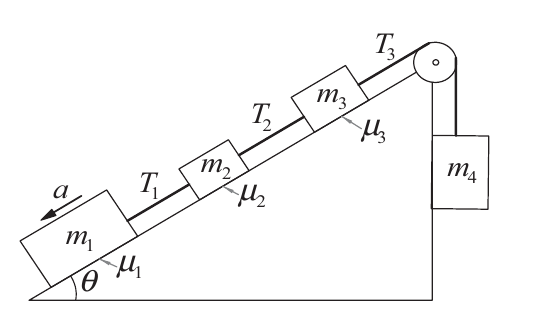

</center>

Cuatro bloques de masas diferentes $m_i$ están conectados por cuerdas de masa despreciable. Tres de los bloques se encuentran sobre un plano inclinado con un ángulo $\theta$, donde los coeficientes de fricción entre los bloques y el plano son $\mu_i$. Las ecuaciones de movimiento para el sistema son:

$$
T_1 + m_1a = m_1g(\sin \theta - \mu_1 \cos \theta)
$$
$$
-T_1 + T_2 + m_2a = m_2g(\sin \theta - \mu_2 \cos \theta)
$$
$$
-T_2 + T_3 + m_3a = m_3g(\sin \theta - \mu_3 \cos \theta)
$$
$$
-T_3 + m_4a = -m_4g
$$

donde:
- $T_i$ representan las tensiones en las cuerdas
- $a$ es la aceleración del sistema
- $\theta = 45^\circ$ es el ángulo de inclinación
- $g = 9.81 m/s^2$ es la aceleración gravitatoria


Determine $a$ y $T_i$

**Datos:**

Masas de los bloques:
$$
\mathbf{m} = \begin{bmatrix}
10 & 4 & 5 & 6 \\
\end{bmatrix}^T kg
$$

Coeficientes de fricción:
$$
\mu = \begin{bmatrix}
0.25 & 0.3 & 0.2 \\
\end{bmatrix}^T
$$


In [ ]:
g = 9.81  # m/s^2
theta = np.radians(45)  #convertimos a radianes

#masas en kg
m = np.array([10, 4, 5, 6])  # m1, m2, m3, m4

#coeficientes de fricción para los bloques
mu = np.array([0.25, 0.3, 0.2])

#vector b
b = np.zeros(4)
b[0] = m[0] * g * (np.sin(theta) - mu[0] * np.cos(theta))
b[1] = m[1] * g * (np.sin(theta) - mu[1] * np.cos(theta))
b[2] = m[2] * g * (np.sin(theta) - mu[2] * np.cos(theta))
b[3] = -m[3] * g


#construimos la matriz A
A = np.array([
    [ m[0],   1,   0,   0],
    [ m[1],  -1,   1,   0],
    [ m[2],   0,  -1,   1],
    [ m[3],   0,   0,  -1]])

#resolver l A * x = b
x = np.linalg.solve(A, b)

a = x[0]
T1, T2, T3 = x[1:]

print(f"Aceleración del sistema: a = {a:.4f} m/s²")
print(f"Tensión T1 = {T1:.2f} N")
print(f"Tensión T2 = {T2:.2f} N")
print(f"Tensión T3 = {T3:.2f} N")


Aceleración del sistema: a = 1.6134 m/s²
Tensión T1 = 35.89 N
Tensión T2 = 48.86 N
Tensión T3 = 68.54 N


# 2.
Considere el circuito de la figura. Usando las leyes de Kirchoff escriba las ecuaciones para corriente y voltaje. Luego, determine la forma matricial y encuentre los valores de la corriente que circula por cada nodo, es decir, $i_{12}$, $i_{23}$ y asi sucesivamente.

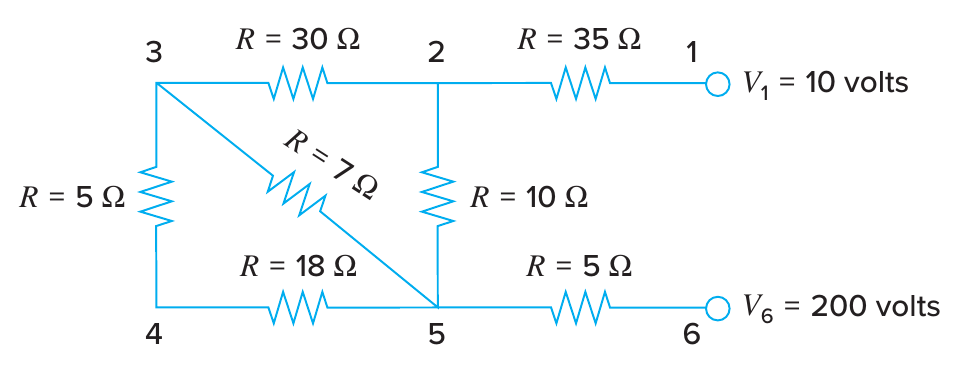


In [2]:
#calores de resistencias
R_32 = 30.0  # Ω
R_21 = 35.0  # Ω
R_35 = 7.0   # Ω
R_34 = 5.0   # Ω
R_25 = 10.0  # Ω
R_45 = 18.0  # Ω
R_56 = 5.0   # Ω

V1 = 10.0
V6 = 200.0

#matriz
G = np.array([
    [1/R_21 + 1/R_32 + 1/R_25,        -1/R_32,                 0.0,               -1/R_25],
    [       -1/R_32,           1/R_32 + 1/R_34 + 1/R_35,    -1/R_34,            -1/R_35],
    [        0.0,                      -1/R_34,          1/R_34 + 1/R_45,       -1/R_45],
    [       -1/R_25,                   -1/R_35,                 -1/R_45,  1/R_25 + 1/R_35 + 1/R_45 + 1/R_56]], dtype=float)

#vector b
b = np.array([ (1/R_21)*V1, 0.0, 0.0, (1/R_56)*V6 ])

#resolver V2, V3, V4, V5
V2, V3, V4, V5 = np.linalg.solve(G, b)

#corrientes en ramas
i12 = (V1 - V2) / R_21
i23 = (V2 - V3) / R_32
i34 = (V3 - V4) / R_34
i45 = (V4 - V5) / R_45
i56 = (V5 - V6) / R_56
i25 = (V2 - V5) / R_25

In [3]:
#resultados
print("Voltajes:")
print(f"V1 = {V1:.6f} V")
print(f"V2 = {V2:.6f} V")
print(f"V3 = {V3:.6f} V")
print(f"V4 = {V4:.6f} V")
print(f"V5 = {V5:.6f} V")
print(f"V6 = {V6:.6f} V\n")

print("Corrientes:")
print(f"i12 = {i12:6f} A")
print(f"i23 = {i23:.6f} A")
print(f"i34 = {i34:.6f} A")
print(f"i45 = {i45:.6f} A")
print(f"i56 = {i56:.6f} A")
print(f"i25 = {i25:.6f} A\n")


Voltajes:
V1 = 10.000000 V
V2 = 149.133743 V
V3 = 175.421214 V
V4 = 176.443505 V
V5 = 180.123751 V
V6 = 200.000000 V

Corrientes:
i12 = -3.975250 A
i23 = -0.876249 A
i34 = -0.204458 A
i45 = -0.204458 A
i56 = -3.975250 A
i25 = -3.099001 A



# 3.
Se sabe que un sistema físico es gobernado por las ecuaciones,

$$
\begin{matrix}
x' &=& 2x&-y&+z, \\
y' &=&   &3y&-z, \\
z' &=& 2x&+y&+3z,
\end{matrix}
$$

donde $x',y',z'$ son las derivadas, en forma vectorial esto se puede representar como $\mathbf{r}'=A\mathbf{r}$ que tiene solución analítica general, $\mathbf{r} = e^{At} \mathbf{r}(0)$.

- Realice la diagonalización de $A$.

- Use el hecho de que $f(A) =U f(D) U^{-1}$ para encontrar $x(t),y(t),z(t)$ en el intervalo de tiempo $[0,2]$.

- Grafique $x(t),y(t),z(t)$ (use la condición inicial $\mathbf{r}(0)=(1,1,2))$.

- Compare el resultado a la solución analítica,

$$
2x  = x(0)(e^{2t}(1+e^{2t}-2t)) + y(0) (-2te^{2t}) + z(0)(e^{2t}(-1+e^{2t})),
$$

$$
2y  = x(0)(-e^{2t}(-1+e^{2t}-2t)) + y(0)(2(t+1)e^{2t}) + z(0)(-e^{2t}(-1+e^{2t})),
$$

$$
2z  = x(0)(e^{2t}(-1+e^{2t}+2t)) + y(0)(2te^{2t}) + z(0)(e^{2t}(1+e^{2t})).
$$

/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.11/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


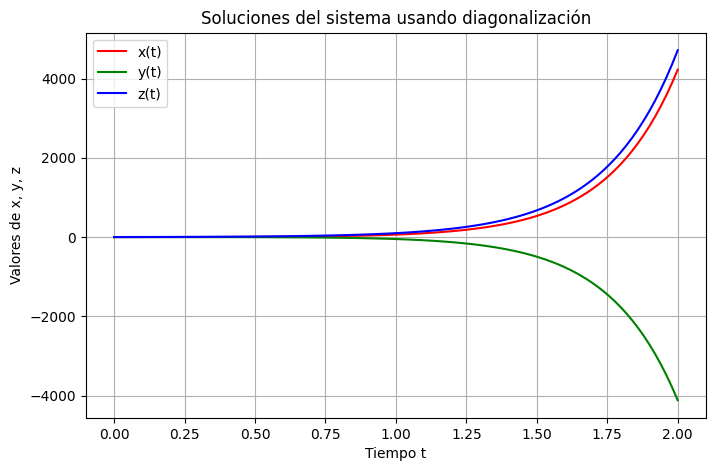

In [ ]:
#matriz A
A = np.array([[2, -1, 1],
              [0, 3, -1],
              [2, 1, 3]])

eigenvalues, eigenvectors = np.linalg.eig(A)
D = np.diag(eigenvalues)
U = eigenvectors
U_inv = np.linalg.inv(U)


#condición inicial
r0 = np.array([1, 1, 2])

#definimos el intervalo de tiempo
t_values = np.linspace(0, 2, 100)

#calculamos la solución r(t)
solutions = np.array([U @ np.diag(np.exp(eigenvalues * t)) @ U_inv @ r0 for t in t_values])

#extraer soluciones
x_values = solutions[:, 0]
y_values = solutions[:, 1]
z_values = solutions[:, 2]


#graficamos las soluciones
plt.figure(figsize=(8, 5))
plt.plot(t_values, x_values, label='x(t)', color='r')
plt.plot(t_values, y_values, label='y(t)', color='g')
plt.plot(t_values, z_values, label='z(t)', color='b')
plt.xlabel('Tiempo t')
plt.ylabel('Valores de x, y, z')
plt.title('Soluciones del sistema usando diagonalización')
plt.legend()
plt.grid()
plt.show()

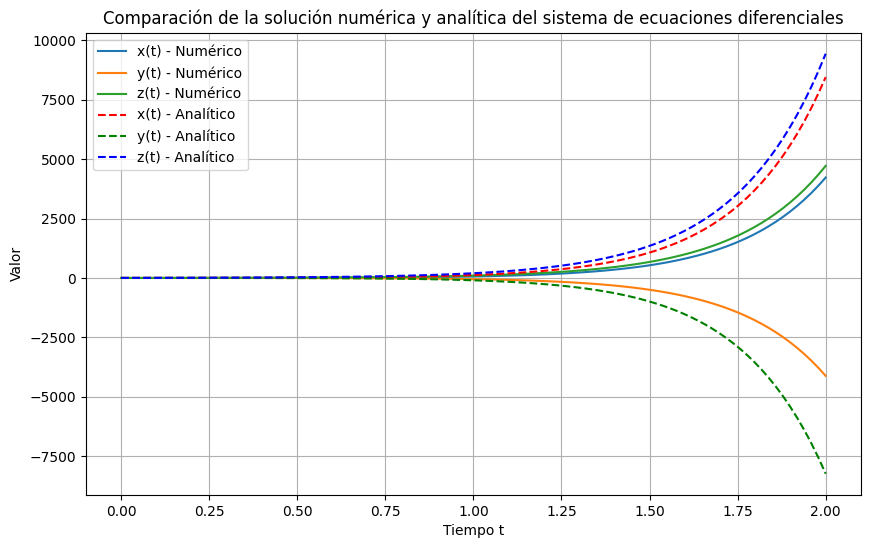

In [ ]:
#función para calcular la solución analítica
def solucion_analitica(x0, y0, z0, t):
    x = x0 * (np.exp(2*t) * (1 + np.exp(2*t) - 2*t)) + y0 * (-2*t*np.exp(2*t)) + z0 * (np.exp(2*t) * (-1 + np.exp(2*t)))
    y = x0 * (-np.exp(2*t) * (-1 + np.exp(2*t) - 2*t)) + y0 * (2*(t+1)*np.exp(2*t)) + z0 * (-np.exp(2*t) * (-1 + np.exp(2*t)))
    z = x0 * (np.exp(2*t) * (-1 + np.exp(2*t) + 2*t)) + y0 * (2*t*np.exp(2*t)) + z0 * (np.exp(2*t) * (1 + np.exp(2*t)))
    return x, y, z

#solución analítica
x_analitico, y_analitico, z_analitico = solucion_analitica(1, 1, 2, t_values)

#graficamos x(t), y(t), z(t) obtenidos numéricamente y analíticamente
plt.figure(figsize=(10, 6))
plt.plot(t_values, x_values, label='x(t) - Numérico')
plt.plot(t_values, y_values, label='y(t) - Numérico')
plt.plot(t_values, z_values, label='z(t) - Numérico')
plt.plot(t_values, x_analitico, 'r--', label='x(t) - Analítico')
plt.plot(t_values, y_analitico, 'g--', label='y(t) - Analítico')
plt.plot(t_values, z_analitico, 'b--', label='z(t) - Analítico')
plt.title('Comparación de la solución numérica y analítica del sistema de ecuaciones diferenciales')
plt.xlabel('Tiempo t')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

# 4.
Un electrón interactúa con un campo magnético uniforme. Para determinar los niveles de energía permitidos del electrón en presencia del campo magnético, es necesario resolver la ecuación:

$$
\hat{H}|\Psi\rangle = E|\Psi\rangle
$$

donde el Hamiltoniano está dado por $H = -\bm{\mu} \cdot \bm{B} = -\gamma \bm{B} \cdot \bm{S}$, siendo $\gamma$ la razón giromagnética, $\bm{B}$ el campo magnético y $\bm{S}$ el espín. Puede demostrarse que el Hamiltoniano se expresa como:

$$
\hat{H} = -\frac{\gamma\hbar}{2}\begin{pmatrix}
B_z & B_x - iB_y \\
B_x + iB_y & -B_z
\end{pmatrix}
$$

El valor experimental de $\gamma$ para el electrón es 2. El orden de magnitud del campo magnético es 1 gauss en dirección z.

- Verifique que $H$ es hermítica.
- Encuentre los niveles de energía permitidos.
- Determine los autovectores y verifique su normalización.



In [ ]:
# Constantes
gamma = 2
hbar = 1

#campo magnético
Bx = 0
By = 0
Bz = 1

#hamiltoniano
H = - (gamma * hbar / 2) * np.array([
    [ Bz,       Bx - 1j * By ],
    [ Bx + 1j * By,   -Bz ]], dtype=complex)

print("Hamiltoniano:\n", H)

Hamiltoniano:
 [[-1.+0.j -0.+0.j]
 [-0.+0.j  1.-0.j]]


In [ ]:
#verificamos si es hermítico
hermitico = np.allclose(H, H.conj().T)
print("¿El Hamiltoniano es hermítico?", hermitico)

#autovalores y autovectores
valores, vectores = np.linalg.eigh(H)
print("Niveles de energía (autovalores):", valores)
print("Autovectores (columnas):\n", vectores)

#verificamos la normalización
for i, v in enumerate(vectores.T):
    norma = np.vdot(v, v)
    print(f"Norma del autovector {i+1}: {norma}")


¿El Hamiltoniano es hermítico? True
Niveles de energía (autovalores): [-1.  1.]
Autovectores (columnas):
 [[1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j]]
Norma del autovector 1: (1+0j)
Norma del autovector 2: (1+0j)


# 5.

Considere el sistema de tres masas y cuatro resortes mostrado en la figura.

<center>

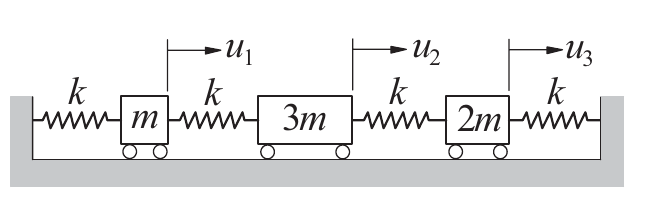
</center>

Las ecuaciones diferenciales que describen el movimiento del sistema masa-resorte son:

$$
k \left( -2u_1 + u_2 \right) = m\ddot{u}_1
$$

$$
k(u_1 - 2u_2 + u_3) = 3m\ddot{u}_2
$$

$$
k(u_2 - 2u_3) = 2m\ddot{u}_3
$$

donde:
- $u_i(t)$ representa el desplazamiento de la masa $i$ desde su posición de equilibrio.
- $k$ es la constante de los resortes.
- $m$ es la masa.

Determinar las frecuencias de vibración ($\omega$) en términos de $\sqrt{k/m}$ y las formas modales correspondientes.

In [ ]:
# Constantes del sistema
k = 1  # para que las frecuencias estén en términos de √(k/m)
m = 1  # para simplificar a razones de m

K = np.array([
    [ 2*k,   -k,    0],
    [ -k,  2*k,   -k],
    [  0,   -k,   k]])

#matriz de masa M
M = np.diag([m, 3*m, 2*m])

#M^{-1} * K
Minv = np.linalg.inv(M)
A = Minv @ K

#autovalores y autovectores
eigvals, eigvecs = np.linalg.eig(A)

#frecuencias naturales en términos de √(k/m)
omegas = np.sqrt(eigvals)

#normalizamos las formas modales
modal_shapes = eigvecs / np.max(np.abs(eigvecs), axis=0)

#resultados
print("Frecuencias naturales (ω) en términos de √(k/m):")
print(np.round(omegas, 4))

print("\nFormas modales normalizadas:")
print(np.round(modal_shapes, 4))

Frecuencias naturales (ω) en términos de √(k/m):
[1.4925 0.9226 0.2965]

Formas modales normalizadas:
[[-1.     -0.6113  0.431 ]
 [ 0.2276 -0.7023  0.8242]
 [-0.0659  1.      1.    ]]
